In [34]:
import pandas as pd
import datetime as dt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("Q:/4. Learning/3nd year students/1. Data business analytics/Report Data Business Analytics/time-series-forecasting/Dataset/Microsoft_Stock.csv")
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00,233.53,233.85,231.10,231.85,24792012


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [37]:
df.set_index('Date',inplace=True)

In [38]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [39]:
# Process data
df['H-L'] = df['High'] - df['Low']
df['O-C'] = df['Open'] - df['Close']
ma_1 = 7
ma_2 = 14
ma_3 = 21
df[f'SMA_{ma_1}'] = df['Close'].rolling(window=ma_1).mean()
df[f'SMA_{ma_2}'] = df['Close'].rolling(window=ma_2).mean()
df[f'SMA_{ma_3}'] = df['Close'].rolling(window=ma_3).mean()

df[f'SD_{ma_1}'] = df['Close'].rolling(window=ma_1).std()
df[f'SD_{ma_3}'] = df['Close'].rolling(window=ma_3).std()
df.dropna(inplace=True)

df.to_csv("stock.csv")
df

,Open,High,Low,Close,Volume,H-L,O-C,SMA_7,SMA_14,SMA_21,SD_7,SD_21
Date,,,,,,,,,,,,
4/30/2015 16:00,48.70,49.54,48.60,48.64,64725457,0.94,0.06,47.012857,44.577857,43.466667,2.673672,3.007869
5/1/2015 16:00,48.58,48.88,48.40,48.66,38937336,0.48,-0.08,47.822857,45.070714,43.844762,2.034213,3.141416
5/4/2015 16:00,48.37,48.87,48.18,48.24,34039485,0.69,0.13,48.522857,45.541429,44.223333,0.496008,3.170505
5/5/2015 16:00,47.82,48.16,47.31,47.60,50369191,0.85,0.22,48.484286,45.922857,44.511429,0.561423,3.190253
5/6/2015 16:00,47.57,47.77,46.02,46.28,52433020,1.75,1.29,48.234286,46.217143,44.737619,1.008809,3.136230
...,...,...,...,...,...,...,...,...,...,...,...,...
3/25/2021 16:00,235.30,236.94,231.57,232.34,34061853,5.37,2.96,234.211429,234.176429,233.168571,3.018644,3.538767
3/26/2021 16:00,231.55,236.71,231.55,236.48,25479853,5.16,-4.93,234.131429,234.825714,233.525238,2.937518,3.473407
3/29/2021 16:00,236.59,236.80,231.88,235.24,25227455,4.92,1.35,234.777143,234.930000,233.661429,2.531355,3.482316


In [52]:
pre_day = 30
scala_x = MinMaxScaler(feature_range=(0,1))
scala_y = MinMaxScaler(feature_range=(0,1))
cols_x = ['H-L', 'O-C', f'SMA_{ma_1}', f'SMA_{ma_2}', f'SMA_{ma_3}', f'SD_{ma_1}', f'SD_{ma_3}']
cols_y = ['Close']
scaled_data_x = scala_x.fit_transform(df[cols_x].values.reshape(-1, len(cols_x)))
scaled_data_y = scala_y.fit_transform(df[cols_y].values.reshape(-1, len(cols_y)))

x_total = []
y_total = []

for i in range(pre_day, len(df)):
    x_total.append(scaled_data_x[i-pre_day:i])
    y_total.append(scaled_data_y[i])

train_size = (int)(len(scaled_data_y) * 0.8)
test_size = (int)(len(scaled_data_y) * 0.1)
val_size = len(df) - train_size - test_size

x_train = np.array(x_total[: train_size])
x_test = np.array(x_total[train_size : train_size + test_size])
x_valid = np.array(x_total[train_size + test_size:])

y_train = np.array(y_total[: train_size])
y_test = np.array(y_total[train_size : train_size + test_size])
y_valid = np.array(y_total[train_size + test_size:])

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_valid.shape, y_valid.shape)

(1192, 30, 7) (1192, 1) (149, 30, 7) (149, 1) (120, 30, 7) (120, 1)


In [53]:
# Build model
model = Sequential()

model.add(LSTM(units=60, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=len(cols_y)))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, steps_per_epoch=40, use_multiprocessing=True, validation_data=(x_valid, y_valid))
model.save("stock-7-2-1.h5")

Epoch 1/50
40/40 [==============================] - 10s 107ms/step - loss: 0.0068 - val_loss: 0.0186
Epoch 2/50
40/40 [==============================] - 3s 63ms/step - loss: 0.0017 - val_loss: 0.0145
Epoch 3/50
40/40 [==============================] - 3s 83ms/step - loss: 0.0012 - val_loss: 0.0118
Epoch 4/50
40/40 [==============================] - 4s 90ms/step - loss: 0.0012 - val_loss: 0.0068
Epoch 5/50
40/40 [==============================] - 4s 106ms/step - loss: 0.0012 - val_loss: 0.0057
Epoch 6/50
40/40 [==============================] - 4s 101ms/step - loss: 0.0011 - val_loss: 0.0061
Epoch 7/50
40/40 [==============================] - 4s 91ms/step - loss: 0.0011 - val_loss: 0.0078
Epoch 8/50
40/40 [==============================] - 4s 103ms/step - loss: 9.2722e-04 - val_loss: 0.0018
Epoch 9/50
40/40 [==============================] - 3s 84ms/step - loss: 0.0010 - val_loss: 0.0043
Epoch 10/50
40/40 [==============================] - 3s 79ms/step - loss: 8.4565e-04 - val_loss: 0.0

In [54]:
# Testing
predict_price = model.predict(x_test)
predict_price = scala_y.inverse_transform(predict_price)

5/5 [==============================] - 2s 22ms/step


(149, 1)


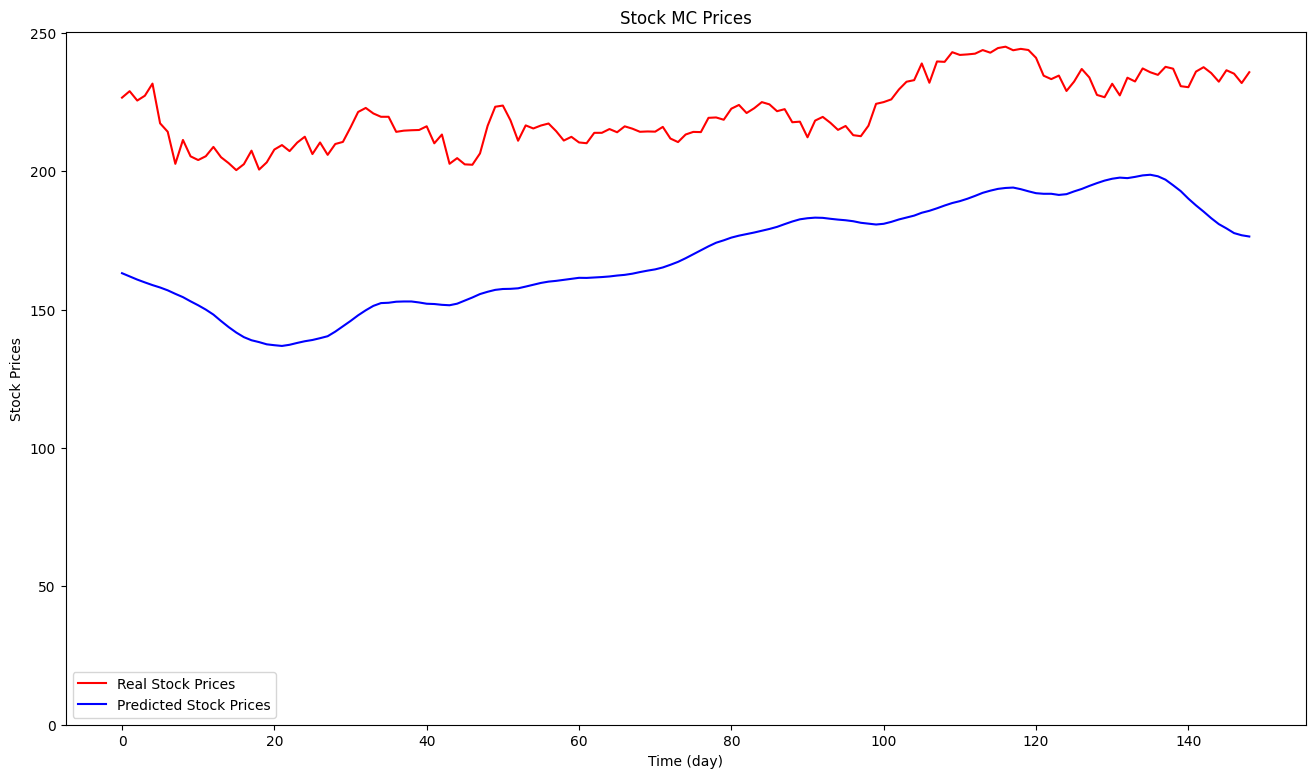

In [55]:
# Ploting the stat
real_price = df[len(df)-test_size:]['Close'].values.reshape(-1,1)
real_price = np.array(real_price)
print(real_price.shape)
real_price = real_price.reshape(real_price.shape[0], 1)

plt.figure(figsize=(16, 9))
plt.plot(real_price, color="red", label=f"Real Stock Prices")
plt.plot(predict_price, color="blue", label=f"Predicted Stock Prices")
plt.title(f"Stock MC Prices")
plt.xlabel("Time (day)")
plt.ylabel("Stock Prices")
plt.ylim(bottom=0)
plt.legend()
plt.show()

In [56]:
# Make Prediction
x_predict = df[len(df)-pre_day:][cols_x].values.reshape(-1, len(cols_x))
x_predict = scala_x.transform(x_predict)
x_predict = np.array(x_predict)
x_predict = x_predict.reshape(1, x_predict.shape[0], len(cols_x))

prediction = model.predict(x_predict)
prediction = scala_y.inverse_transform(prediction)
print(prediction)

1/1 [==============================] - 0s 44ms/step
[[208.13116]]


In [57]:
mae = mean_absolute_error(real_price, predict_price)
mape = mean_absolute_percentage_error(real_price, predict_price)
mse = mean_squared_error(real_price, predict_price)
rmse = np.sqrt(mse)
r2 = r2_score(real_price, predict_price)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 51.61
MAPE: 23.46%
MSE: 2785.95
RMSE: 52.78
R2: -18.56
